# DATA VISULAIZATION EXERCISE

# Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Problem: The Boston House Pricing

## Dataset Description

Boston House pricing dataset is provided with this notebook.

The details of this dataset are as follows:

Number of Instances: 506 
Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

Attribute Information (in order):
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per \$10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    percentage of lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

Missing Attribute Values: None

Creator: Harrison, D. and Rubinfeld, D.L.

This Boston House Pricing data has been taken from a reaserch paper, which can be found at 
[Source: Original research paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

## Loading Data into DataFrame

In [19]:
#loading the dataset from the csv file
dataset=pd.read_csv('Datasets/Boston_Dataset.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Visualising Data - Histograms and Distributions

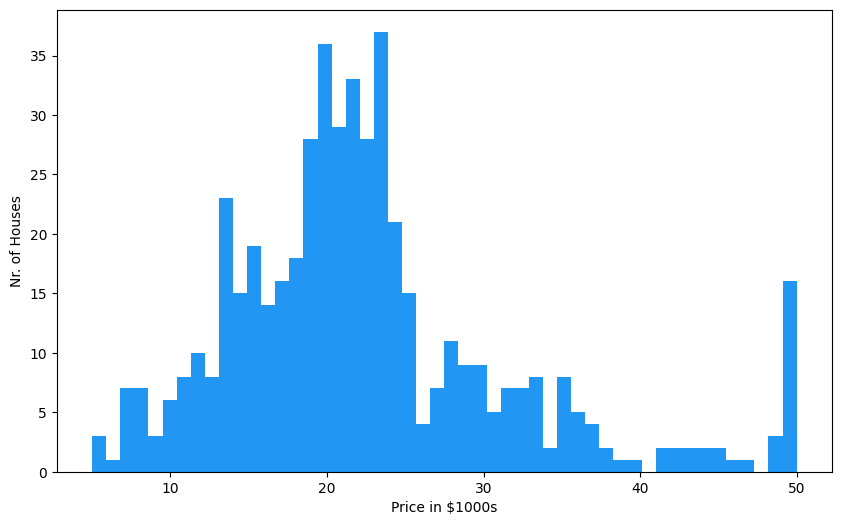

In [11]:
#Let us draw histograms for different features. 
#Recall that a histogram is a plot of frequencies of different values in a feature against these values. 
#We will use method hist of the package matplotlib for this purpose.

#Let us first see the distribution of the target, which is the house price.
plt.figure(figsize=(10, 6))
plt.hist(dataset['PRICE'], bins=50, ec='black', color='#2196f3')
#Here we randomly selected 50 bins, price is a continuous variable here. 
#You can use the method dataset['PRICE'].value_counts() to see the distinct values in this column.
#This attribute bin can also be skipped, in that case matplotlib selects an appropriate number of bins by itself.
plt.xlabel('Price in $1000s')
plt.ylabel('Nr. of Houses')
plt.show()

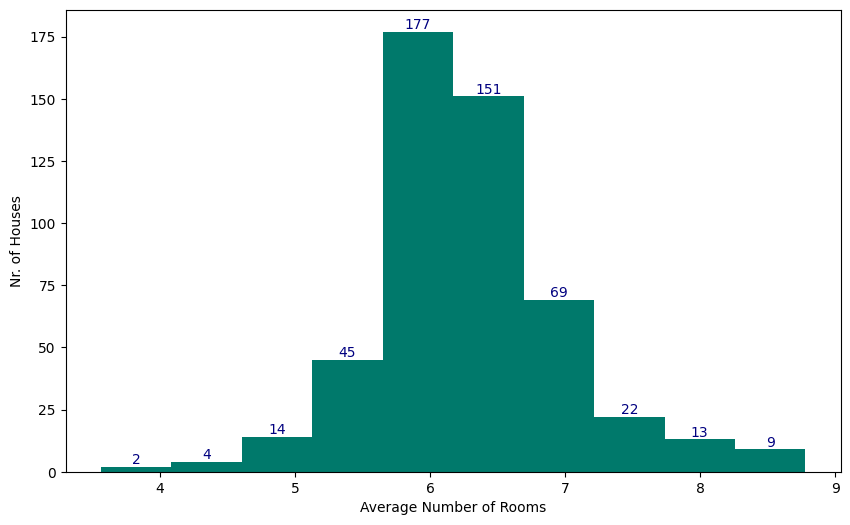

In [18]:
#Now let us see distribution of RM which is the avarage number of rooms in the area.
#This again is a continuous variables. We are not specifying number of  bins here, letting matplotlib decide for itself.
plt.figure(figsize=(10, 6))
_, _, bars = plt.hist(dataset['RM'], ec='black', color='#00796b',)

plt.bar_label(bars, fontsize=10, color='navy')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Houses')
plt.show()

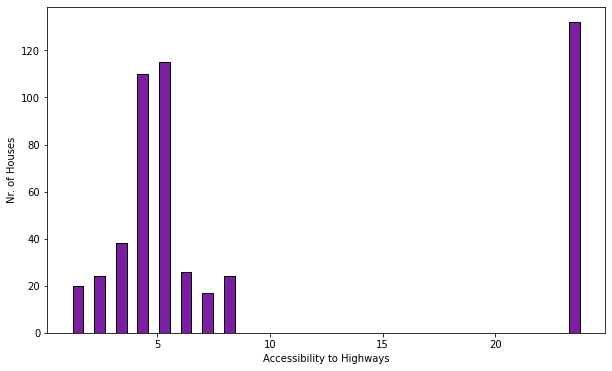

In [ ]:
#Now let us see distribution of RAD which indicates the index of accessibilty to highways.
plt.figure(figsize=(10, 6))
plt.hist(dataset['RAD'], bins=24, ec='black', color='#7b1fa2', rwidth=0.5)
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

In [ ]:
#TASK FOR YOU
dataset['CHAS'].value_counts()
#Run the above statement and then plot histogram for this feature CHAS which shows if the house is situated near Charle' River.

0    471
1     35
Name: CHAS, dtype: int64

## Correlation

## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [ ]:
#corr is the method in pandas which can directly find correlation between two quantities.
#Let us find the correlation between PRICE (target) and RM (feature).
dataset['PRICE'].corr(dataset['RM'])
#The resulting value shows moderate positive correlation

0.6953599470715394

In [ ]:
#Similarly let us find the correlation between PRICE (target) and PTRATIO (feature).
dataset['PRICE'].corr(dataset['PTRATIO'])
#This shows moderate negavtive correlation

-0.5077866855375618

In [ ]:
#Now let us find all correlation coefficients at once
dataset.corr()
#Here observe that correlation between INDUS and DIS is quite high and may cause multicollinearity.
#Also note that the values are same both ways, i.e. ZN and CRIME is same as CRIME and ZN.
#So upper right diagonal is same as lower left diagonal.
#Also note that correlation of a variable with itself is always 1.

#Notice that finding higher values in this dense map is difficult, there is an easier way to do this - by using a heatmap.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


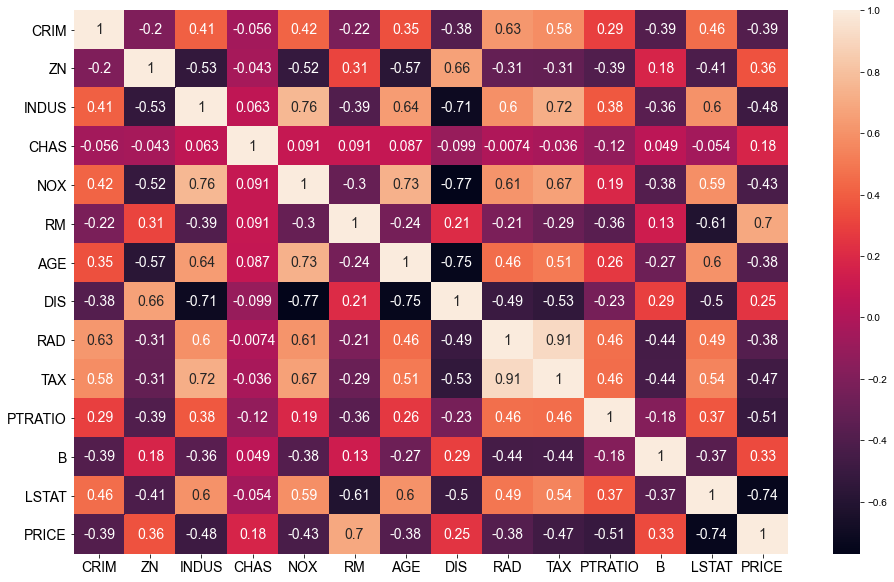

In [ ]:
#A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. 
#The color bar on the right side is the key.

#Generating a heatmap for all correlation coefficients. 
plt.figure(figsize=(16,10))
sns.heatmap(dataset.corr(),  annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Visualizing Correlation Through Scatter Plot

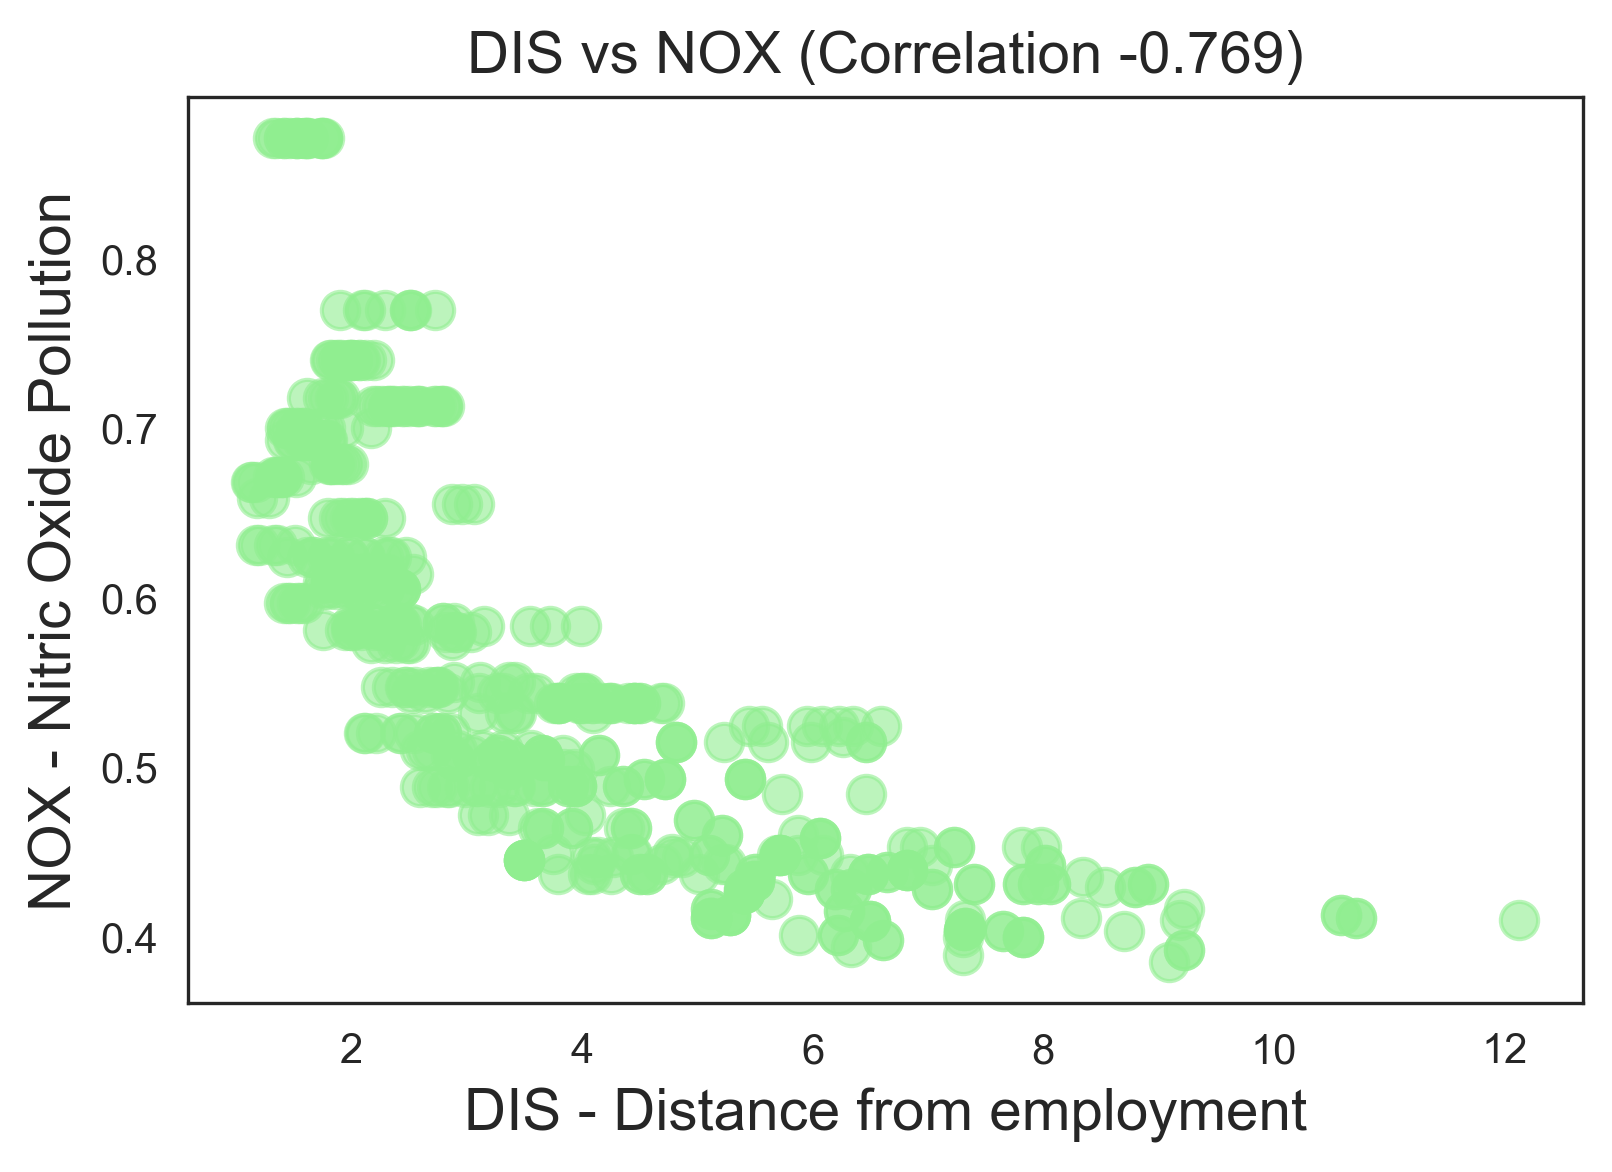

In [ ]:
#Let us create scatterplot between NOX and DIS to visualize correlation.

#Let us print the correlation found from corr method too in the heading to verify the results.
nox_dis_corr = round(dataset['NOX'].corr(dataset['DIS']), 3)

plt.figure(figsize=(6, 4), dpi=300)
plt.scatter(x=dataset['DIS'], y=dataset['NOX'], alpha=0.6, s=80, color='lightgreen')
plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize=14)
plt.xlabel('DIS - Distance from employment', fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize=14)
plt.show()
#The plot shows quite strong neagtive correlation between the two features.

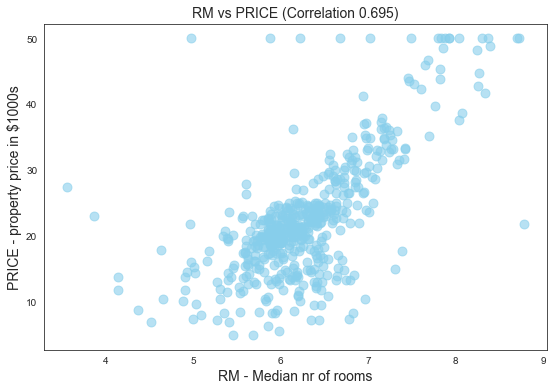

In [ ]:
#Another scatter plot between RM and PRICE.
rm_tgt_corr = round(dataset['RM'].corr(dataset['PRICE']), 3)
plt.figure(figsize=(9, 6))
plt.scatter(x=dataset['RM'], y=dataset['PRICE'], alpha=0.6, s=80, color='skyblue')
plt.title(f'RM vs PRICE (Correlation {rm_tgt_corr})', fontsize=14)
plt.xlabel('RM - Median nr of rooms', fontsize=14)
plt.ylabel('PRICE - property price in $1000s', fontsize=14)
plt.show()

### The PairPlot
- This is a method of seaborn package, which can be used to see all the scatterplots as well as histograms at once.
- The diagonal plots are histograms.

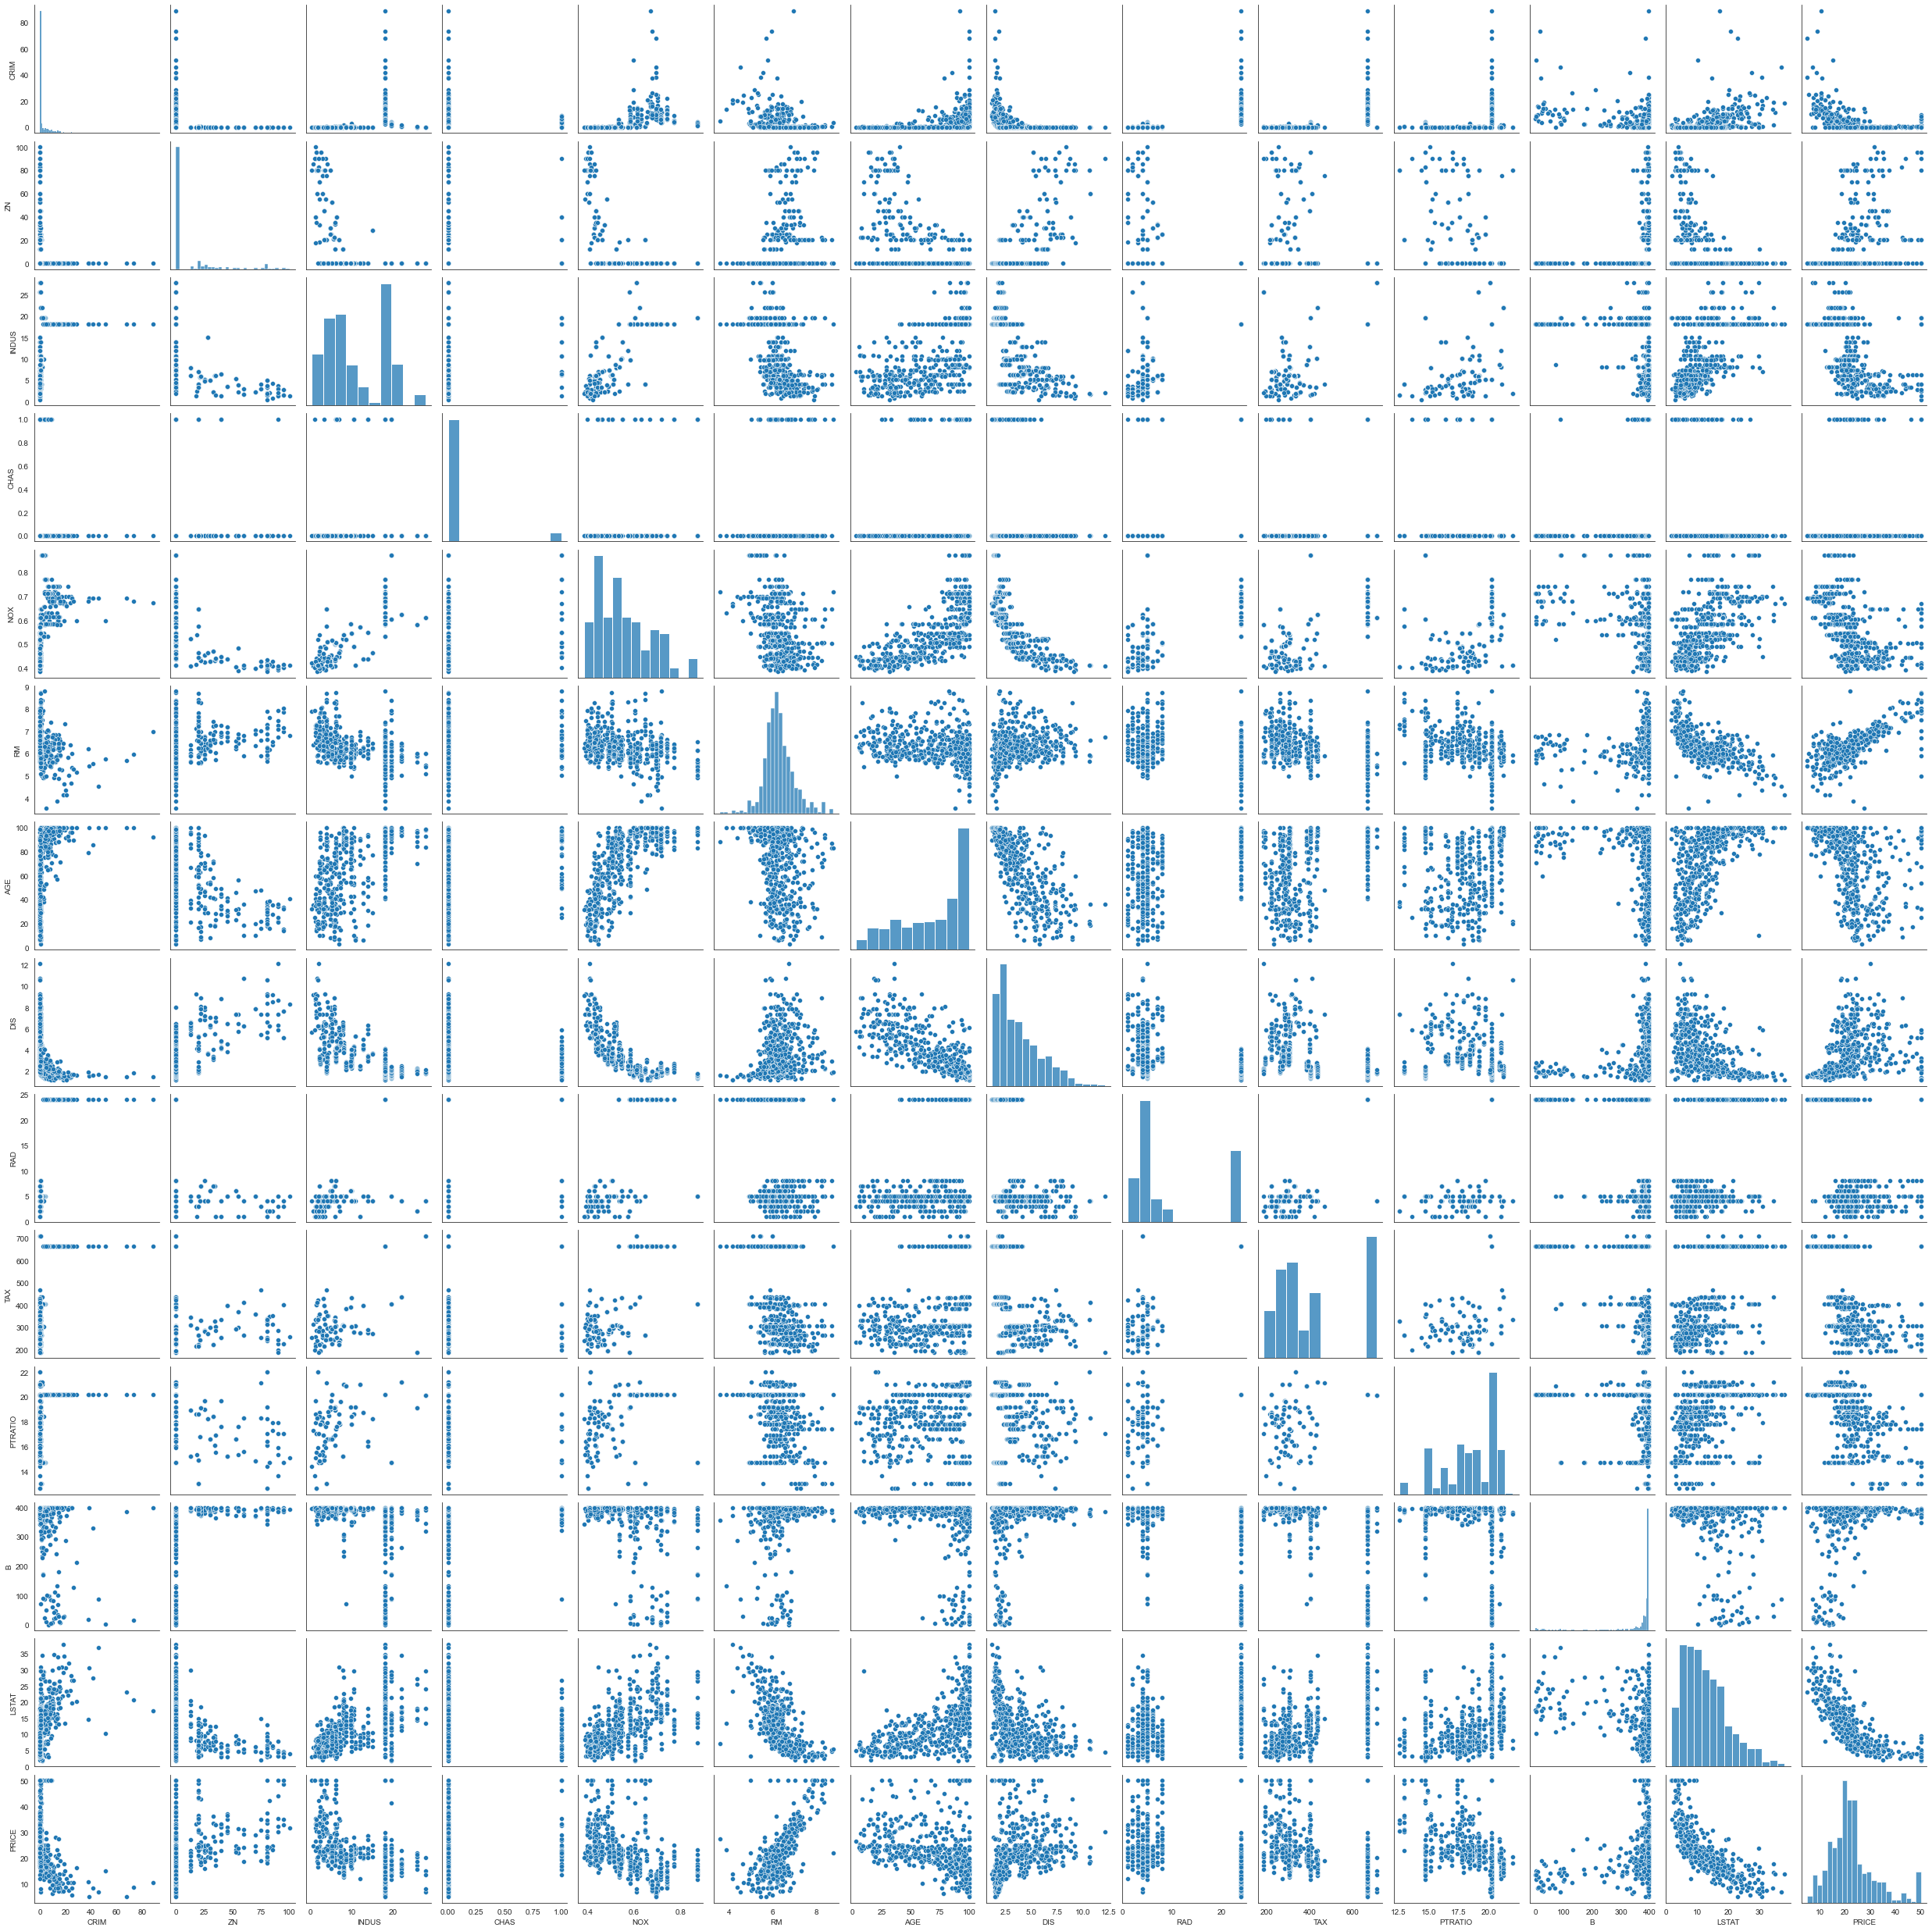

Wall time: 23.6 s


In [ ]:
%%time 
#This time is a magic function of notebook, used to find the execution time of a piece of code.
#Since generation of pairplot will take some time, let us measure it using this magic function.
#It will print the wall time in the end.

#Generating pairplot - all correlation plots at once
sns.pairplot(dataset)
plt.show()